In [1]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
from sklearn.datasets import load_boston
ds_boston = load_boston()
ds_boston

c:\Users\Lucyfer\Documents\Fernando\EntornosVirtuales\data_analytics\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datase

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
ds_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
df_boston = pd.DataFrame(ds_boston.data, columns=ds_boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df_boston['MEDV'] = ds_boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


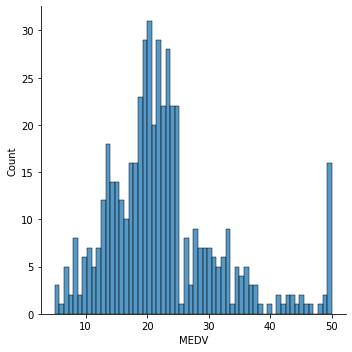

In [6]:
sns.displot(df_boston['MEDV'], bins= 60)
plt.show()

In [7]:
correlation_matrix_bostos = df_boston.corr().round(2)
correlation_matrix_bostos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


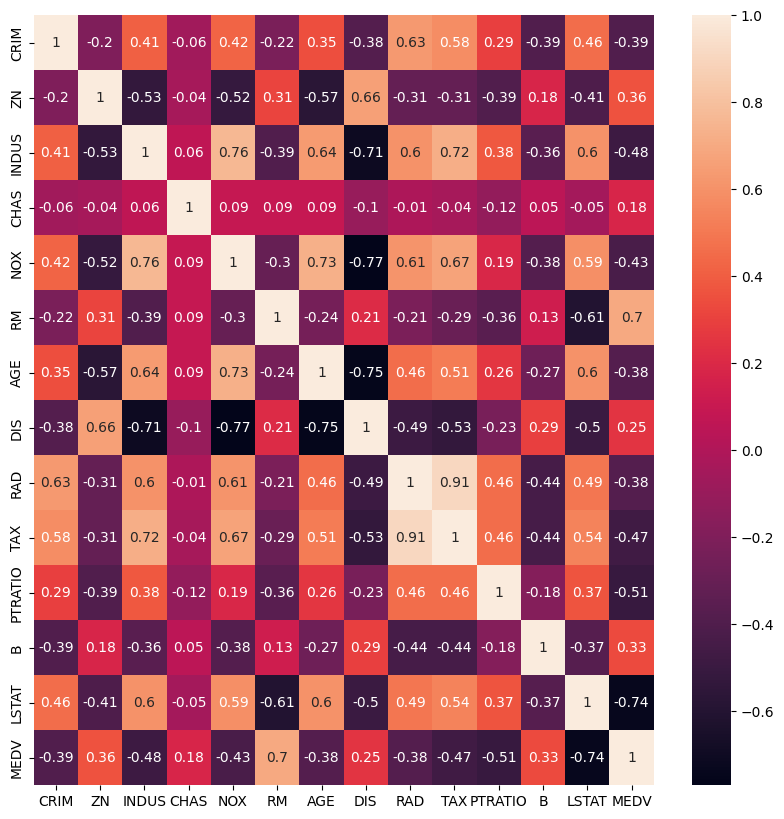

In [21]:
sns.heatmap(data= correlation_matrix_bostos, annot=True)
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

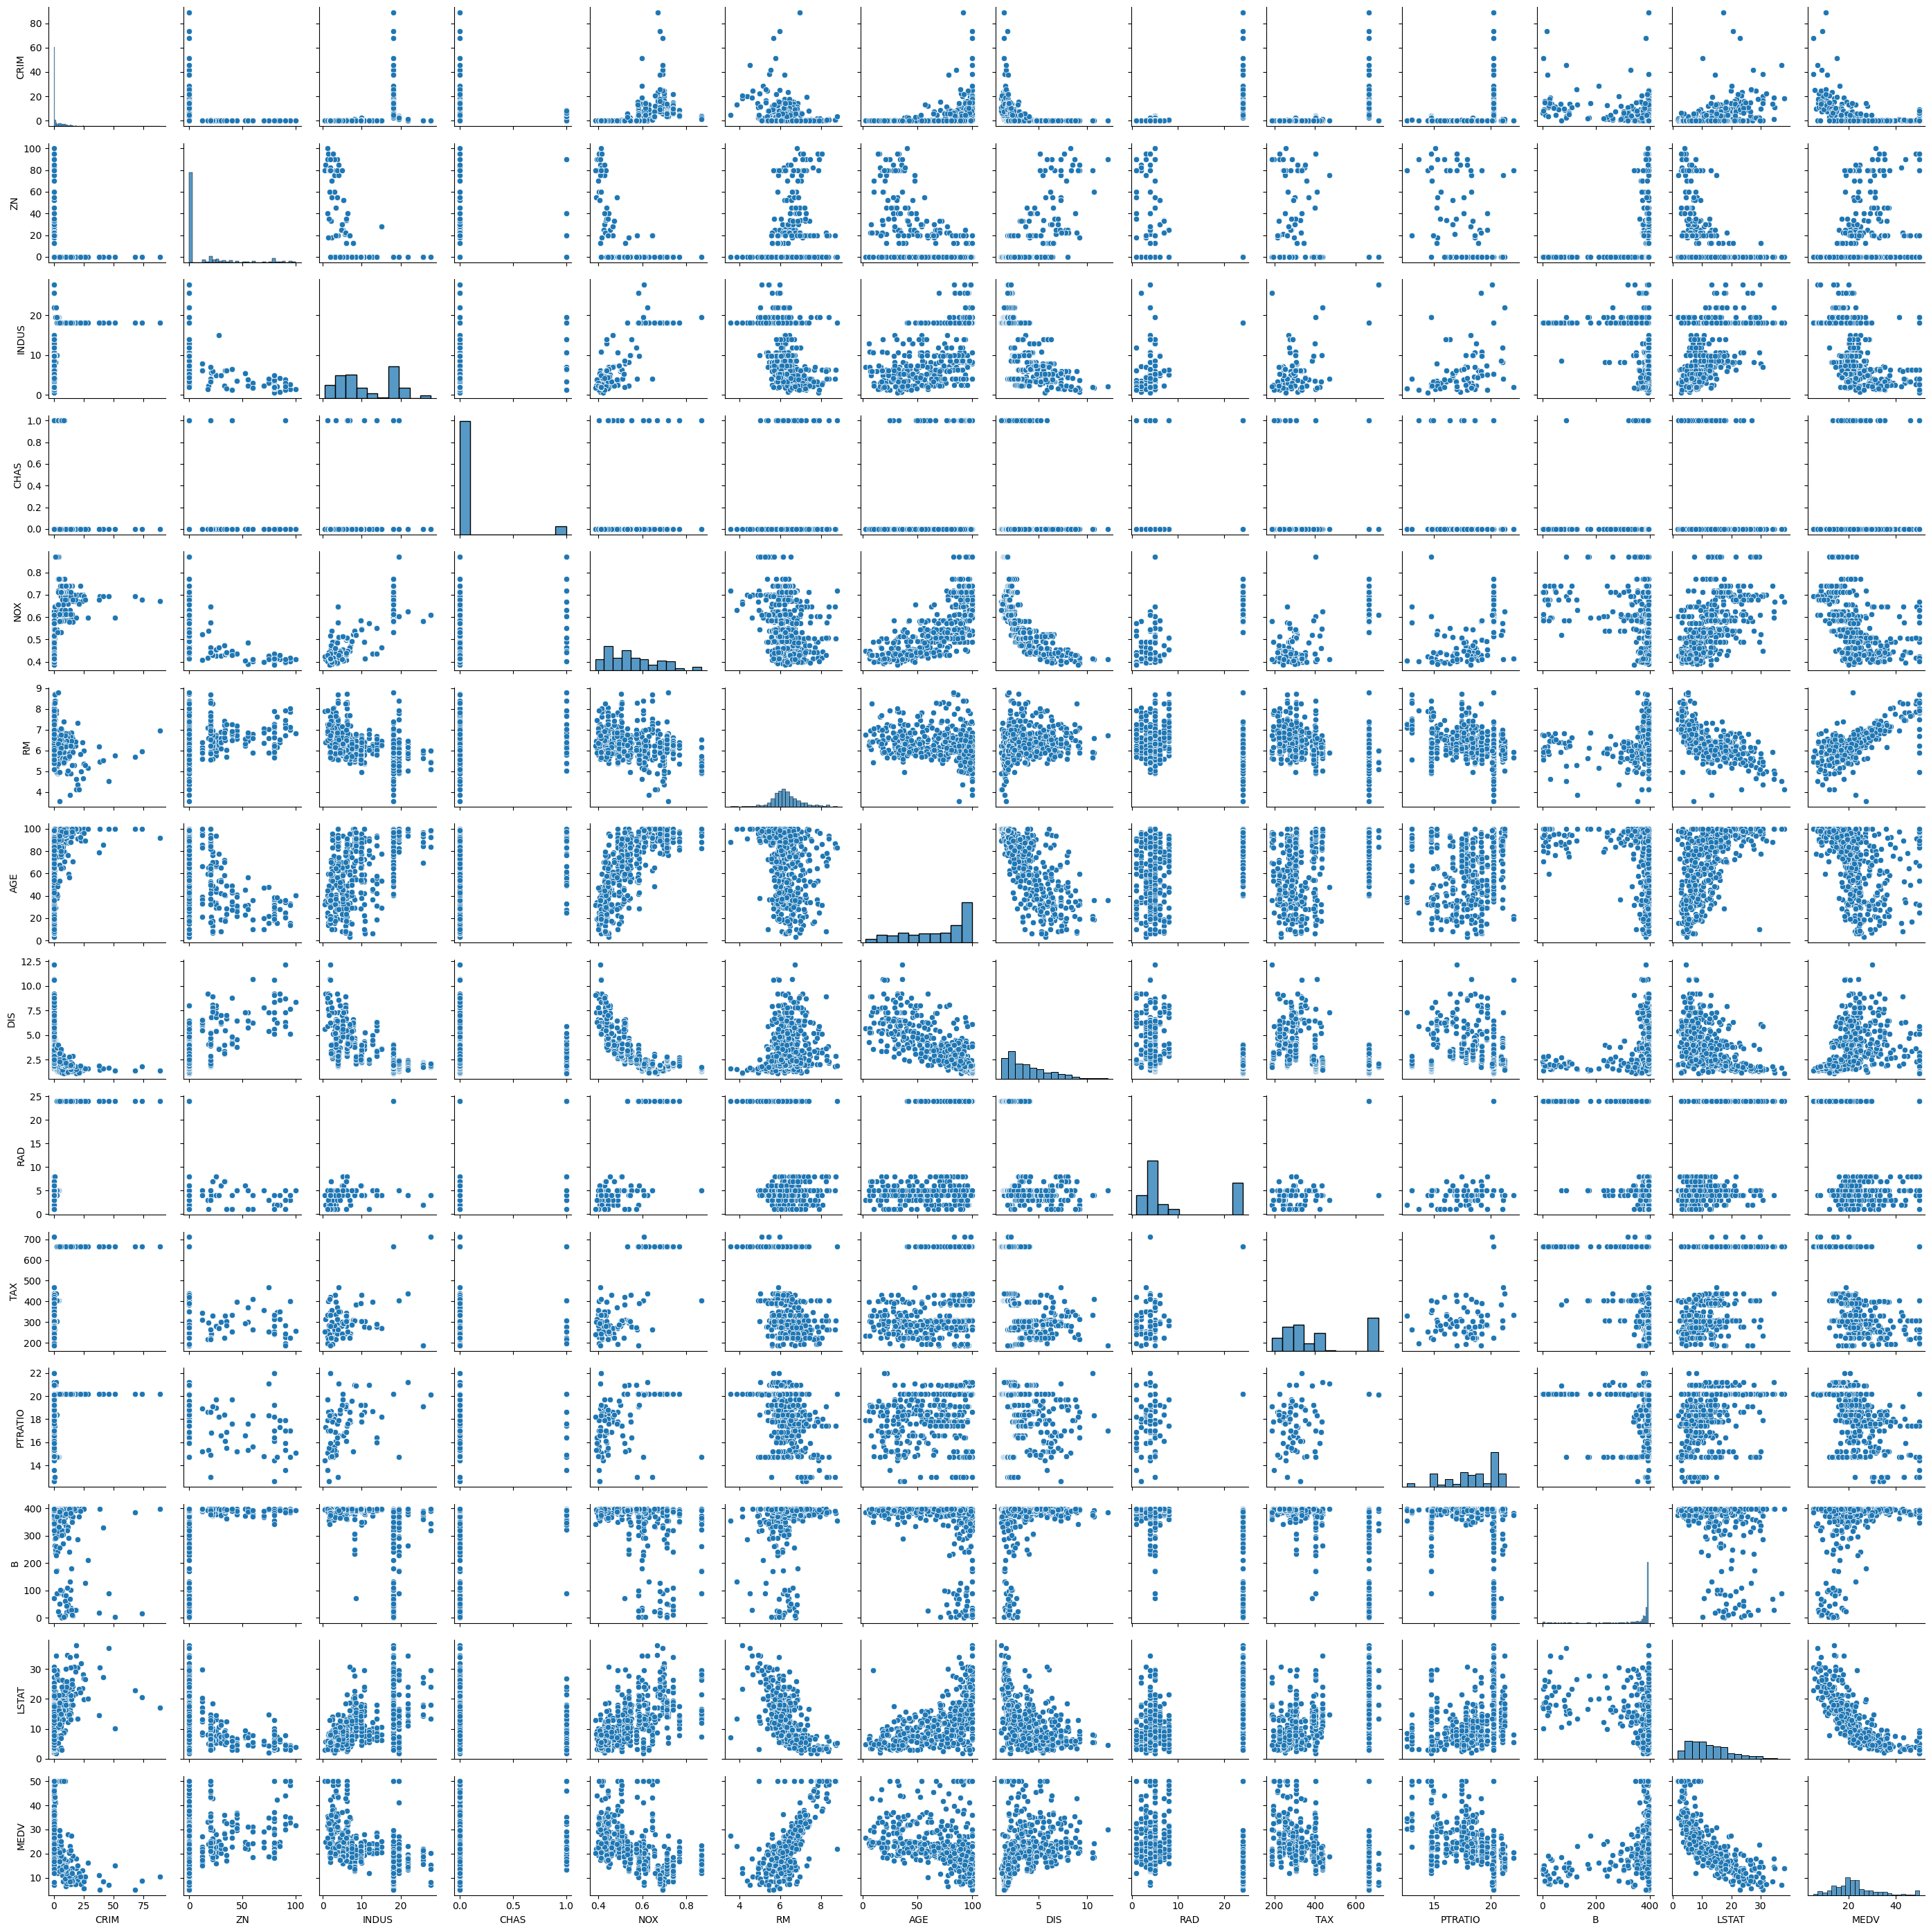

In [9]:
sns.pairplot(df_boston, height= 2)
plt.tight_layout()

In [10]:
df_model_boston = df_boston[['RM','LSTAT','PTRATIO']]
df_model_boston.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [11]:
df_model_boston_price = df_boston['MEDV']
df_model_boston_price.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df_model_boston, df_model_boston_price, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(404, 3)
(404,)
(102, 3)
(102,)


In [13]:
from sklearn.linear_model import LinearRegression
lin_model_boston = LinearRegression()
lin_model_boston.fit(x_train, y_train)

print(f'Coeficients: {lin_model_boston.coef_} ')
print(f'Independent Term: {lin_model_boston.intercept_} ')

Coeficients: [ 4.93311836 -0.56712588 -0.86709475] 
Independent Term: 14.58809926157105 


In [14]:
from sklearn.metrics import r2_score
y_train_predict = lin_model_boston.predict(x_train)
r2 = r2_score(y_train, y_train_predict)
print('The model performace for TRAINING set')
print(f'R2 score: {r2} ')

The model performace for TRAINING set
R2 score: 0.6864566575056517 


In [15]:
y_test_predict = lin_model_boston.predict(x_test)
r2 = r2_score(y_test, y_test_predict)
print('The model performace for TEST set')
print(f'R2 score: {r2} ')

ajusted_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test)-x_test.shape[1]-1)
print(f'Ajusted r2 score is: {ajusted_r2} ')

The model performace for TEST set
R2 score: 0.6302528487272829 
Ajusted r2 score is: 0.6189340583821997 


In [16]:
predicted_data_boston= lin_model_boston.predict(df_model_boston)
predicted_data_boston[0:5]

array([30.93251583, 25.64583505, 32.31275073, 31.22803953, 30.60764331])

In [17]:
dfAP = pd.DataFrame({'Actual': df_boston['MEDV'],'Prediccion': predicted_data_boston})
dfAP.head(10)

,Actual,Prediccion
0,24.0,30.932516
1,21.6,25.645835
2,34.7,32.312751
3,33.4,31.228040
4,36.2,30.607643
5,28.7,27.138653
6,22.9,24.016792
7,27.1,20.995005
8,16.5,12.212571
9,18.9,21.328849


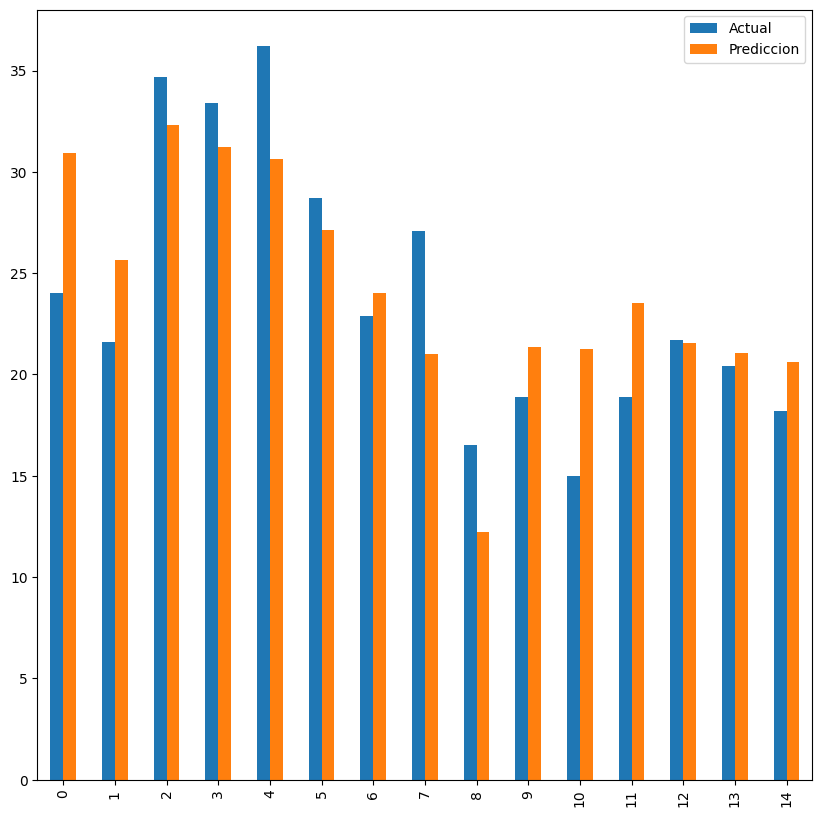

In [22]:
dfAP.head(15).plot(kind='bar')
plt.show()